In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [14]:
# Load the MNIST Fashion dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 23s 59ms/step - loss: 0.6753 - accuracy: 0.7571 - val_loss: 0.4268 - val_accuracy: 0.8452
Epoch 2/10
375/375 [==============================] - 26s 71ms/step - loss: 0.4440 - accuracy: 0.8381 - val_loss: 0.3685 - val_accuracy: 0.8635
Epoch 3/10
375/375 [==============================] - 26s 68ms/step - loss: 0.3855 - accuracy: 0.8600 - val_loss: 0.3282 - val_accuracy: 0.8812
Epoch 4/10
375/375 [==============================] - 26s 69ms/step - loss: 0.3508 - accuracy: 0.8738 - val_loss: 0.3129 - val_accuracy: 0.8838
Epoch 5/10
375/375 [==============================] - 28s 75ms/step - loss: 0.3261 - accuracy: 0.8817 - val_loss: 0.3063 - val_accuracy: 0.8854
Epoch 6/10
375/375 [==============================] - 26s 69ms/step - loss: 0.3068 - accuracy: 0.8891 - val_loss: 0.2801 - val_accuracy: 0.8949
Epoch 7/10
375/375 [==============================] - 29s 77ms/step - loss: 0.2897 - accuracy: 0.8956 - val_loss: 0.2660 - val_accuracy:

313/313 [==============================] - 3s 9ms/step - loss: 0.2697 - accuracy: 0.9056
Test Loss: 0.26972082257270813
Test Accuracy: 0.9056000113487244


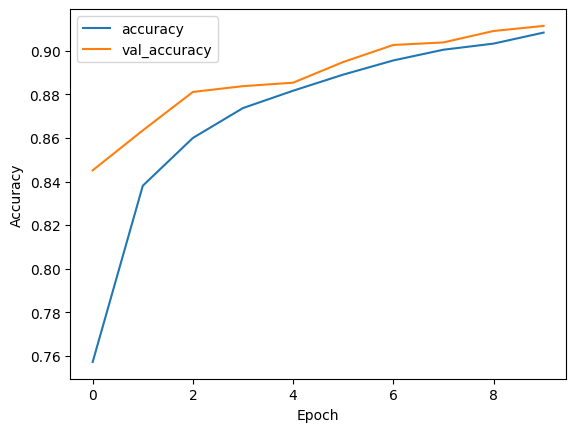

In [17]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()